In [136]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/hombresabio/AI/Waves/visavis-seir/')
from scripts.client import VisAVisClient
from scripts.make_protocol import make_protocol

In [137]:
from subplots_from_axsize import subplots_from_axsize

def plot_result(outfile, result, title=None):
    data = result.states
    
    fig, ax = subplots_from_axsize(
        1, 1, axsize=(20, 8),
        left=0., right=0., bottom=0., top=0.
    )

    data_selected = data.copy() #data[data['seconds'] < 4*60*60].copy()
    data_selected['E'] = data_selected['E'] > 0
    data_selected['I'] = data_selected['I'] > 0
    data_selected['R'] = data_selected['R'] > 0

    img_E = data_selected.groupby(['seconds', 'h'])['E'].mean().unstack().to_numpy().T
    img_I = data_selected.groupby(['seconds', 'h'])['I'].mean().unstack().to_numpy().T
    img_R = data_selected.groupby(['seconds', 'h'])['R'].mean().unstack().to_numpy().T

    img = img_E + img_I

    ax.imshow(
        img,
        cmap='gray',
        origin='lower',
        aspect='auto',
        interpolation='none',
    )

    ax.set_xlabel('time')
    ax.set_axis_off()
    
    if title is not None:
        ax.annotate(
            title, (0.5, 0.9),
            xycoords='axes fraction', va='center', ha='center',
            color='red', fontsize=32
        )

    fig.savefig(outfile)
    plt.close(fig)

In [138]:
PARAMETERS_DEFAULT = {
  "c_rate": 1,
  "e_incr": 1,
  "i_incr": 1,
  "r_incr": 0.0667
}

In [174]:
%%time
results = []
for channel_height in range(7, 8):

    client = VisAVisClient(
        visavis_bin=f'/home/hombresabio/AI/Waves/visavis-seir/target/bins/vis-a-vis-{channel_height}',
    )

    for interval in [100]:

        protocol_file_path = make_protocol(
            pulse_intervals = [interval, 1500],
            duration=4,
            out_folder='./', #f'./interval-{interval}',
        )
        
        for sim in range(25):
            result = client.run(
                parameters_json=PARAMETERS_DEFAULT,
                protocol_file_path= "/home/hombresabio/AI/Waves/visavis-seir/notebooks/out.protocol" #protocol_file_path,
            )
            results.append(result.states)

        #plot_result(
        #    f"./tkankony_{channel_height}_{interval}.png",
        #    result,
        #    title=f"channel height: {channel_height}, interval: {interval}"
        #)

Starting simulation /tmp/sim_LTAUKQGTRSOCWIJW
Finished simulation /tmp/sim_LTAUKQGTRSOCWIJW
Starting simulation /tmp/sim_DVZANYACAJPCYMLQ
Finished simulation /tmp/sim_DVZANYACAJPCYMLQ
Starting simulation /tmp/sim_NCXRRNMKIGNLUGFF
Finished simulation /tmp/sim_NCXRRNMKIGNLUGFF
Starting simulation /tmp/sim_WZGASRMOHYQNZFDB
Finished simulation /tmp/sim_WZGASRMOHYQNZFDB
Starting simulation /tmp/sim_TMYBBWMVANCPROHA
Finished simulation /tmp/sim_TMYBBWMVANCPROHA
Starting simulation /tmp/sim_HDPWSQLCCATXSEMX
Finished simulation /tmp/sim_HDPWSQLCCATXSEMX
Starting simulation /tmp/sim_FOLSSHUPDEEPIKEC
Finished simulation /tmp/sim_FOLSSHUPDEEPIKEC
Starting simulation /tmp/sim_UULQPXRPBXCBQFJA
Finished simulation /tmp/sim_UULQPXRPBXCBQFJA
Starting simulation /tmp/sim_LZKXSCKPVKPNTIMR
Finished simulation /tmp/sim_LZKXSCKPVKPNTIMR
Starting simulation /tmp/sim_ALNOVHJPDPFHBYUL
Finished simulation /tmp/sim_ALNOVHJPDPFHBYUL
Starting simulation /tmp/sim_PLEZKRIBCVUYNTRH
Finished simulation /tmp/sim_PLEZK

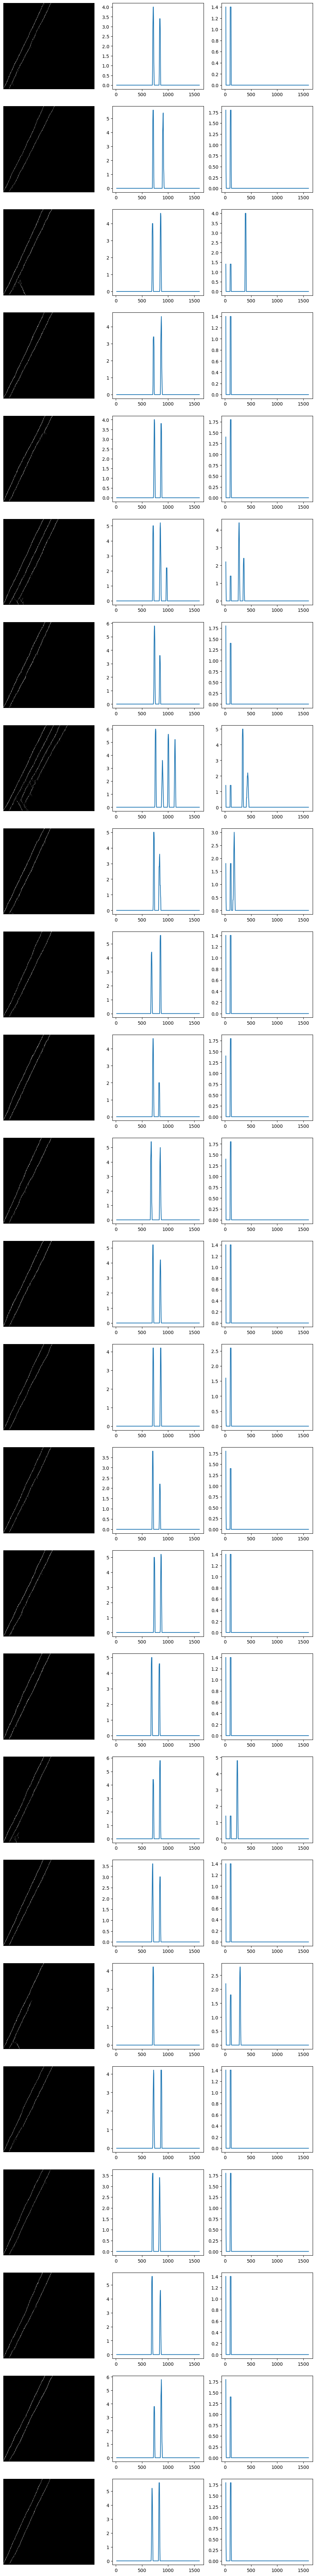

In [178]:
import seaborn as sns
cols = 3
rows = 25
plt.figure(figsize=(4* cols, 4 * rows)) 
for i, df in enumerate(results):
    ax = plt.subplot(rows, cols, 3 * i + 1)
    img_E = df.groupby(['seconds', 'h'])['E'].sum().unstack().T
    img_I = df.groupby(['seconds', 'h'])['I'].sum().unstack().T
    img = img_E + img_I

    ax.imshow(
        img.to_numpy(),
        cmap='gray',
        origin='lower',
        aspect='auto',
        interpolation='none',
    )
    ax.set_xlabel('time')
    ax.set_axis_off()
    ax_2 = plt.subplot(rows, cols, 3 * i + 2)
    roll_finish = img.iloc[-1].rolling(5).mean()
    plt.plot(roll_finish)
    n = len(roll_finish[(roll_finish.rolling(1) != 0) & (roll_finish == 0)])
    ax_2.set_title(f" States identified {n}")
    plt.subplot(rows, cols, 3 * i + 3)
    roll_start = img.iloc[1].rolling(5).mean()
    plt.()